## Title
#### Competition Data Talent Fair

## Introduction

Nama : Raden Mas Xyla Ramadhan

Batch : 13

## External Link

## Working Area


#### Import Libraries


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
import pickle
import nltk
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re

from sklearn.metrics import classification_report


from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, TextVectorization, GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# **No 1**


**Data Set :** Dataset 1 (Dataset from MNC Portal)

**Objective :**


## Data Loading


In [35]:
#DataSet Loading
data1 = pd.read_csv('final data.csv')
#Displaying DataFrame
data1

In [ ]:
#make a sample because the data is too big
data1 = data1.sample(frac =.10)

## Data Cleaning

In [ ]:
#Checking information on DataFrame
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95855 entries, 57525 to 796636
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         95855 non-null  int64  
 1   viewers_id         95855 non-null  object 
 2   content_id         95855 non-null  object 
 3   hit_timestamp      95855 non-null  object 
 4   user_type          95855 non-null  object 
 5   category_id        95855 non-null  float64
 6   tagging            91997 non-null  object 
 7   creator_id         95855 non-null  object 
 8   category_name      95855 non-null  object 
 9   viewers_birthdate  443 non-null    object 
 10  viewers_gender     443 non-null    object 
 11  viewers_region     428 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [ ]:
#Checking Missing Value
data1.isnull().sum()

Unnamed: 0               0
viewers_id               0
content_id               0
hit_timestamp            0
user_type                0
category_id              0
tagging               3858
creator_id               0
category_name            0
viewers_birthdate    95412
viewers_gender       95412
viewers_region       95427
dtype: int64

In [ ]:
#Checking data duplicate
data1.duplicated(keep = False).sum()

0

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95855 entries, 57525 to 796636
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         95855 non-null  int64  
 1   viewers_id         95855 non-null  object 
 2   content_id         95855 non-null  object 
 3   hit_timestamp      95855 non-null  object 
 4   user_type          95855 non-null  object 
 5   category_id        95855 non-null  float64
 6   tagging            91997 non-null  object 
 7   creator_id         95855 non-null  object 
 8   category_name      95855 non-null  object 
 9   viewers_birthdate  443 non-null    object 
 10  viewers_gender     443 non-null    object 
 11  viewers_region     428 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [ ]:
data1["hit_timestamp"] = pd.to_datetime(data1["hit_timestamp"])


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95855 entries, 57525 to 796636
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         95855 non-null  int64         
 1   viewers_id         95855 non-null  object        
 2   content_id         95855 non-null  object        
 3   hit_timestamp      95855 non-null  datetime64[ns]
 4   user_type          95855 non-null  object        
 5   category_id        95855 non-null  float64       
 6   tagging            91997 non-null  object        
 7   creator_id         95855 non-null  object        
 8   category_name      95855 non-null  object        
 9   viewers_birthdate  443 non-null    object        
 10  viewers_gender     443 non-null    object        
 11  viewers_region     428 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 9.5+ MB


In [ ]:
data1.tail(5)

,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
896778,896778,UN-DsXpN8s,54c27525ec2448b8b1d6681997b95dc8,2022-11-13,Anonymus User,31.0,"[{""tag_id"": ""4piwDn"", ""tag_name"": ""wsbk-indone...",39as83,Otomotif,NaN,NaN,NaN
623693,623693,UN-XjeN0mL,23998197ca474eefa6e3f5459eaaf177,2022-08-15,Anonymus User,28.0,"[{""tag_id"": ""9W1neX"", ""tag_name"": ""jeffbezos"",...",JntaDW,Keuangan dan Bisnis,NaN,NaN,NaN
599706,599706,UN-eh8ce8A,accac2defc5f4351a1ffb20d7efc8b3b,2022-08-16,Anonymus User,28.0,"[{""tag_id"": ""V8UqKX"", ""tag_name"": ""ebay"", ""tag...",JntaDW,Keuangan dan Bisnis,NaN,NaN,NaN
83933,83933,UN-Qtrj7FT,a7b2b9b4fdb64a06b40b3c0b559e93d5,2022-09-15,Anonymus User,33.0,"[{""tag_id"": ""rHxrrU"", ""tag_name"": ""otak_sapi"",...",JntaDW,Wisata dan Kuliner,NaN,NaN,NaN
796636,796636,UN-004e8Kh,1c0b3d593b7e4aed887ed61b91320535,2022-11-13,Anonymus User,27.0,"[{""tag_id"": ""PWC73c"", ""tag_name"": ""kolesterol""...",39jY83,Kesehatan,NaN,NaN,NaN


## EDA

In [ ]:
#check value counts 
data1["category_name"].value_counts()

Olahraga               12717
Politik & Peristiwa    12074
Teknologi               9707
Gaya Hidup              9478
Musik dan Film          7846
Wisata dan Kuliner      6226
Otomotif                6146
Games                   5704
Kebijakan Publik        5343
Keuangan dan Bisnis     4423
Hiburan                 4082
Luxury                  3908
Kesehatan               3648
Ekonomi                 1827
Gawai                   1538
Kecantikan               607
Budaya                   581
Name: category_name, dtype: int64

In [ ]:
data1["user_type"].value_counts()

Anonymus User    95383
Register User      472
Name: user_type, dtype: int64

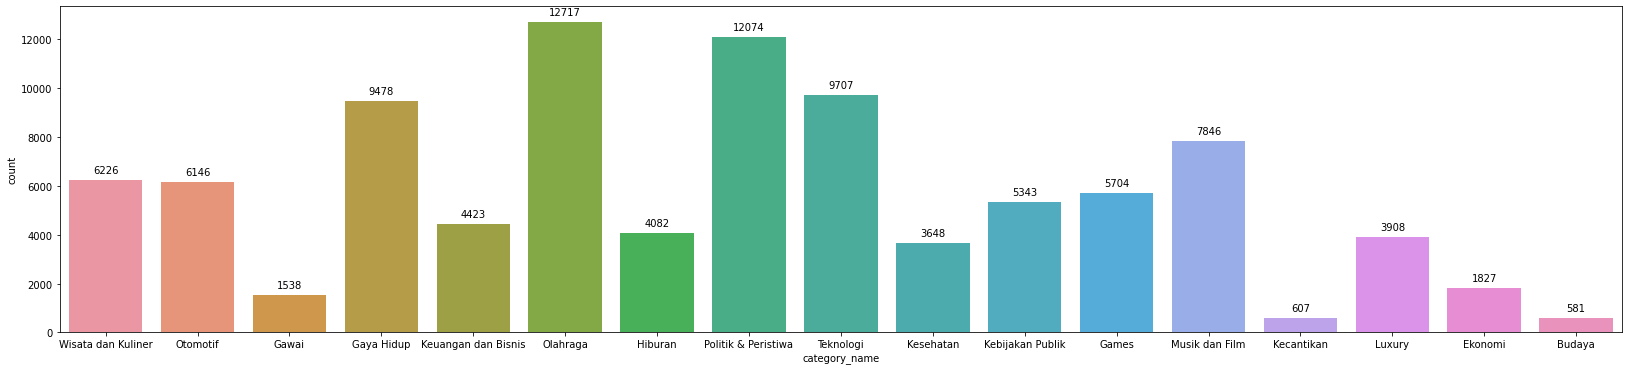

In [ ]:
#check category name
plt.figure(figsize=(28, 6))
fig = sns.countplot(data=data1, x = 'category_name')
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


## Data Preprocessing

In [ ]:
#remove unwanted data
data1=data1[['user_type','tagging','category_name']]

In [ ]:
#Checking Missing Value
data1.isnull().sum()

user_type        0
tagging          0
category_name    0
dtype: int64

In [ ]:
#Checking Missing Value
data1.dropna(inplace=True)

## Model Inference

In [ ]:
#Get Data for Model Inference
data_inf1 = data1.sample(20, random_state=53)
data_inf1

,user_type,tagging,category_name
419661,Anonymus User,"[{""tag_id"": ""yXCCJ6"", ""tag_name"": ""banjir"", ""t...",Politik & Peristiwa
709579,Anonymus User,"[{""tag_id"": ""f92f4044f79d402db9042a3c5b441a81""...",Musik dan Film
709836,Anonymus User,"[{""tag_id"": ""f92f4044f79d402db9042a3c5b441a81""...",Musik dan Film
141426,Anonymus User,"[{""tag_id"": ""OCUWTb"", ""tag_name"": ""marselinofe...",Olahraga
363231,Anonymus User,"[{""tag_id"": ""KIkbcR"", ""tag_name"": ""uang palsu""...",Politik & Peristiwa
82276,Anonymus User,"[{""tag_id"": ""9U2PI2"", ""tag_name"": ""sunset"", ""t...",Wisata dan Kuliner
502357,Anonymus User,"[{""tag_id"": ""vMASuc"", ""tag_name"": ""americaneks...",Teknologi
933567,Anonymus User,"[{""tag_id"": ""eP2V10"", ""tag_name"": ""vivo"", ""tag...",Gawai
456648,Anonymus User,"[{""tag_id"": ""GZuXBq"", ""tag_name"": ""bbm"", ""tag_...",Kebijakan Publik
319885,Anonymus User,"[{""tag_id"": ""eKxiQ4"", ""tag_name"": ""masalalu"", ...",Gaya Hidup


In [ ]:
#Remove Inference Set
data_train_test1 = data1.drop(data_inf1.index)
data_train_test1

,user_type,tagging,category_name
923692,Anonymus User,"[{""tag_id"": ""JKsIpL"", ""tag_name"": ""realmadrid""...",Otomotif
942010,Anonymus User,"[{""tag_id"": ""tKP8Cp"", ""tag_name"": ""cara-mudah-...",Gawai
235431,Anonymus User,"[{""tag_id"": ""8G4osa"", ""tag_name"": ""ayam"", ""tag...",Gaya Hidup
944785,Anonymus User,"[{""tag_id"": ""hYLJqP"", ""tag_name"": ""jet-tempur-...",Gawai
632270,Anonymus User,"[{""tag_id"": ""DHxC9h"", ""tag_name"": ""ump"", ""tag_...",Keuangan dan Bisnis
...,...,...,...
896778,Anonymus User,"[{""tag_id"": ""4piwDn"", ""tag_name"": ""wsbk-indone...",Otomotif
623693,Anonymus User,"[{""tag_id"": ""9W1neX"", ""tag_name"": ""jeffbezos"",...",Keuangan dan Bisnis
599706,Anonymus User,"[{""tag_id"": ""V8UqKX"", ""tag_name"": ""ebay"", ""tag...",Keuangan dan Bisnis
83933,Anonymus User,"[{""tag_id"": ""rHxrrU"", ""tag_name"": ""otak_sapi"",...",Wisata dan Kuliner


In [ ]:
#Reset Index
data_train_test1.reset_index(drop=True, inplace=True)
data_inf1.reset_index(drop=True, inplace=True)
data_train_test1

,user_type,tagging,category_name
0,Anonymus User,"[{""tag_id"": ""JKsIpL"", ""tag_name"": ""realmadrid""...",Otomotif
1,Anonymus User,"[{""tag_id"": ""tKP8Cp"", ""tag_name"": ""cara-mudah-...",Gawai
2,Anonymus User,"[{""tag_id"": ""8G4osa"", ""tag_name"": ""ayam"", ""tag...",Gaya Hidup
3,Anonymus User,"[{""tag_id"": ""hYLJqP"", ""tag_name"": ""jet-tempur-...",Gawai
4,Anonymus User,"[{""tag_id"": ""DHxC9h"", ""tag_name"": ""ump"", ""tag_...",Keuangan dan Bisnis
...,...,...,...
91972,Anonymus User,"[{""tag_id"": ""4piwDn"", ""tag_name"": ""wsbk-indone...",Otomotif
91973,Anonymus User,"[{""tag_id"": ""9W1neX"", ""tag_name"": ""jeffbezos"",...",Keuangan dan Bisnis
91974,Anonymus User,"[{""tag_id"": ""V8UqKX"", ""tag_name"": ""ebay"", ""tag...",Keuangan dan Bisnis
91975,Anonymus User,"[{""tag_id"": ""rHxrrU"", ""tag_name"": ""otak_sapi"",...",Wisata dan Kuliner


### Case Folding

In [ ]:
from nltk.corpus import stopwords

stop_words=nltk.corpus.stopwords.words('english')
# removing not and no from stop words as we need them for our model training
stopwords = stopwords.words("english")
stopwords.remove('not')
stopwords.remove('no')

# intializing method for lemmatizing words
lemmatizer = WordNetLemmatizer()

# now creating funtion to clean our data
def cleaned_review(review):
    # remove any html tags
    new_review = BeautifulSoup(review).get_text()
    
    # remove urls from reviews
    no_urls = new_review.replace('http\S+', '').replace('www\S+', '')
    
    # remove any non-letters
    clean_review = re.sub("[^a-zA-Z]", " ", no_urls)
    
    # convert whole sentence to lowercase and split
    new_words = clean_review.lower().split()
    
    # converting stopwords list to set for faster search
    stops = set(stopwords)
    
    # using stopwords to remove irrelavent words and lemmatizing the final output
    final_words = [lemmatizer.lemmatize(word) for word in new_words if not word in stops]
    
    # return the final result
    return (" ".join(final_words))

In [ ]:
# now we will use our funtion to get cleaned data and no. of words
data_train_test1['tag-cleaned'] = data_train_test1['tagging'].apply(lambda x:cleaned_review(x))

In [ ]:
data_train_test1['tag-cleaned']

14208     ilewqd letitia wright slug letitia wright crea...
14209     ilewqd letitia wright slug letitia wright crea...
14210     ilewqd letitia wright slug letitia wright crea...
14211     ilewqd letitia wright slug letitia wright crea...
16380     cecdy anime slug anime created z updateat z wp...
                                ...                        
957172    hioa l melayu slug melayu created z updateat z...
958312    sxvaks pelajarquran slug pelajarquran created ...
958320    sxvaks pelajarquran slug pelajarquran created ...
958383    lgms teks proklamasi slug teks proklamasi crea...
958385    lgms teks proklamasi slug teks proklamasi crea...
Name: tag-cleaned, Length: 3275, dtype: object

In [ ]:
# comparing cleaned data with original data
print(data_train_test1.iloc[100,1])
print()
print(data_train_test1.iloc[100,3])

[{"tag_id": "Vwg8an", "tag_name": "anime", "tag_slug": "anime", "status": 1, "created": {"$date": "2022-06-28T09:43:32.998Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "9wFY11", "tag_name": "maincharacter", "tag_slug": "maincharacter", "status": 1, "created": {"$date": "2022-06-30T05:58:56.179Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 1}, {"tag_id": "9fq4k3", "tag_name": "overpower", "tag_slug": "overpower", "status": 1, "created": {"$date": "2022-04-12T06:36:55.658Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 1}]

vwg anime slug anime created z updateat z wfy maincharacter slug maincharacter created z updateat z fq k overpower slug overpower created z updateat z


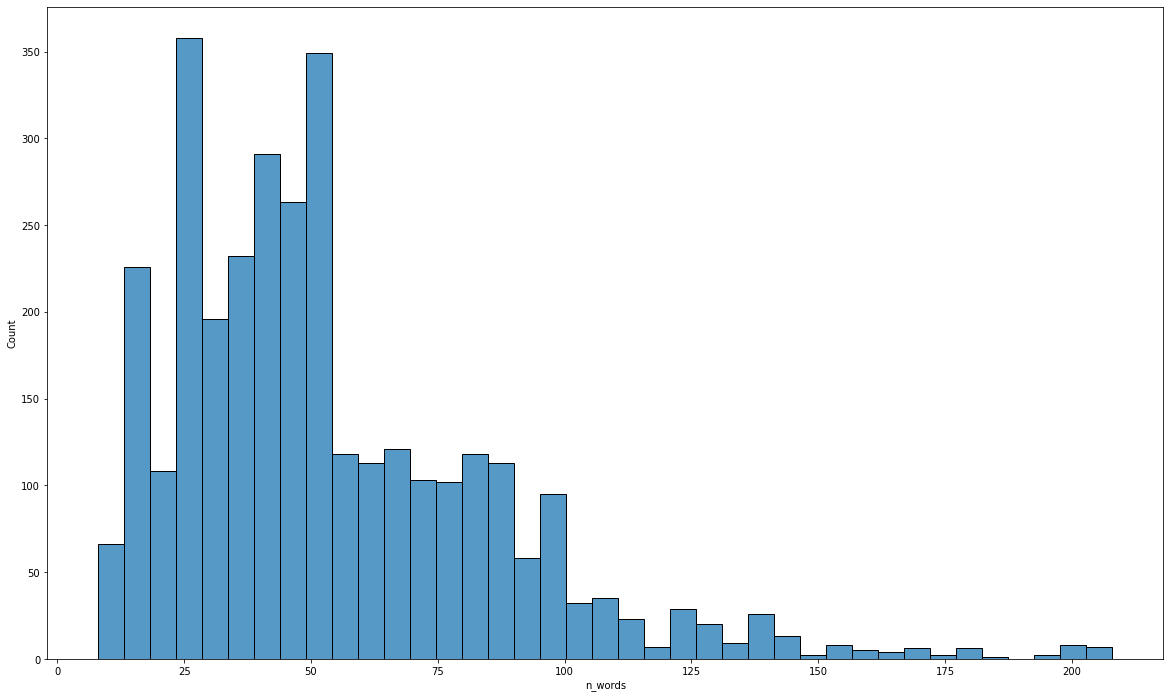

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
# finding ideal length to use for further process
data_train_test1['n_words'] = data_train_test1['tag-cleaned'].apply(lambda x:len(x.split()))
sns.histplot(data = data_train_test1, x='n_words')
plt.show()

In [ ]:
# so we see above that max no.of words in each sentence is 40
max_len = 170

In [ ]:
# now we will tokenize the words to sequence so that our model can understand
# we will also pad the sentences with less than 40 words to make size of each sentence equal
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train_test1['tag-cleaned'].values)
sequences = tokenizer.texts_to_sequences(data_train_test1['tag-cleaned'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7335 unique tokens.


In [ ]:
#define x
X1 = pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
#define y
y1 = data_train_test1[['category_name']]

In [ ]:
# splitting the data for training and testing
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.2, random_state=63)
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((2620, 170), (655, 170), (2620, 1), (655, 1))

## Label Encoder

In [ ]:
le1 = LabelEncoder()
y_train_le1 = le1.fit_transform(y_train1)
y_test_le1 = le1.fit_transform(y_test1)

c:\Users\Xyla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train_le1

array([11, 15,  5, ...,  5,  3,  4])

In [ ]:
y_test_le1

array([16, 15, 14,  3,  8,  4,  4, 11,  4,  2, 16, 14,  6, 16, 14, 11,  2,
       11, 16,  2, 13,  4, 11,  5, 14,  9, 15,  2, 16,  9,  9,  9,  8, 14,
        9, 14, 13, 11, 11,  2,  5,  4, 14, 13,  8,  4,  4,  9, 15, 16,  9,
       16, 12,  4,  4,  2,  2,  5,  4, 15,  9, 16,  4, 15,  4, 16, 11, 15,
       11, 14,  8, 12,  4, 11, 12, 12,  8,  9, 11,  7, 12, 16, 14, 13,  7,
        9, 12,  0, 16,  9, 16, 11, 16, 15,  5,  4, 15, 16,  8,  4, 12, 15,
        4, 15, 15,  4,  6,  8, 11, 16,  4, 13, 16, 15,  2,  4, 15,  5, 11,
        4, 14,  5, 14,  9,  2,  4, 11, 14,  5,  9, 16,  5,  4,  4,  8, 14,
        9,  5,  4, 15,  5,  5,  3,  7,  7,  5, 14,  4,  4,  4, 12, 16,  5,
       12, 12, 10, 16,  4,  4,  5,  2, 14,  4,  2,  0, 13, 15, 12, 16, 13,
        2, 15,  4, 12,  4,  4, 12,  4,  3,  7, 14,  4, 16,  4, 10, 13,  9,
        1, 15,  4,  9, 16, 14, 14,  3, 12, 16,  8, 16, 15, 14,  9,  7,  5,
        0, 12, 12, 15, 16,  2,  5,  8, 16, 16, 16, 11,  4, 14,  5,  5, 15,
        5, 11,  2, 12,  7

# Model Definition

## LSTM Model

In [ ]:
# now we create our model
# here n_most_words = 7334(vocab_size)+1
n_most_words = 7335
n_dim = 64
model_lstm_1 = Sequential()
model_lstm_1.add(Embedding(n_most_words,n_dim,input_length = X_train1.shape[1]))
model_lstm_1.add(LSTM(32))
model_lstm_1.add(Dense(3,activation='softmax'))
model_lstm_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
print(model_lstm_1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 170, 64)           469440    
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 481,955
Trainable params: 481,955
Non-trainable params: 0
_________________________________________________________________
None


### Model Training

In [ ]:
model_lstm_1_history = model_lstm_1.fit(X_train1,y_train_le1,epochs=30,validation_data=(X_test1, y_test_le1), batch_size = 256 , verbose=0)

### Model Evaluation

In [ ]:
lstm_pred_train1=model_lstm_1.predict(X_train1)
lstm_pred_test1=model_lstm_1.predict(X_test1)
lstm_pred_train_lbl1=lstm_pred_train1.argmax(axis=1)
lstm_pred_test_lbl1=lstm_pred_test1.argmax(axis=1)
print(classification_report(y_train_le1, lstm_pred_train_lbl1))
print(classification_report(y_test_le1, lstm_pred_test_lbl1))

21/21 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.01      1.00      0.02        21
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       196
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00       322
           5       0.00      0.00      0.00       250
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00       101
           9       0.00      0.00      0.00       153
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00       219
          12       0.00      0.00      0.00       206
          13       0.00      0.00      0.00        57
          14       0.00      0.00      0.00       275
          15       0.00      0.00      0.00       347
          16       0.00    

c:\Users\Xyla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Xyla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Xyla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# **No 2**


**Data Set :** Dataset 2 (Dataset from Sinarmas Land) IndonesiaCreditData.xlsx

**Objective :**
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

In [ ]:
#DataSet Loading
data2 = pd.read_excel('IndonesiaCreditData.xlsx', sheet_name="Dataset")
#Displaying DataFrame
data2.head(5)

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car


In [ ]:
#Checking Missing Value
data2.isnull().sum()

No                    0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
data2.dropna(inplace=True)


Bad Risk Qualification
- Job 0 - unskilled and non-resident & 1 - unskilled and resident
- Housing - rent
- Checking account - little

In [ ]:
# create a new column based on the loan_status column that will be our target variable
data2['Risk'] = np.where(data2.loc[:, 'Job'].isin([1,2]) & (data2.loc[:, 'Checking account'].isin(["little"])) | (data2.loc[:, 'Housing'].isin(["rent"])), "Bad", "Good")

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                522 non-null    int64 
 1   Age               522 non-null    int64 
 2   Sex               522 non-null    object
 3   Job               522 non-null    int64 
 4   Housing           522 non-null    object
 5   Saving accounts   522 non-null    object
 6   Checking account  522 non-null    object
 7   Credit amount     522 non-null    int64 
 8   Duration          522 non-null    int64 
 9   Purpose           522 non-null    object
 10  Risk              522 non-null    object
dtypes: int64(5), object(6)
memory usage: 48.9+ KB


In [ ]:
#Checking data duplicate
data2.duplicated(keep = False).sum()

0

In [ ]:
data2.head(50)

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,Good
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,Good
4,4,53,male,2,free,little,little,60383130,24,car,Good
7,7,35,male,3,rent,little,moderate,86148252,36,car,Good
9,9,28,male,3,own,little,moderate,64896366,30,car,Good
10,10,25,female,2,rent,little,moderate,16056705,12,car,Good
11,11,24,female,2,rent,little,little,53414892,48,business,Bad
12,12,22,female,2,own,little,moderate,19429233,12,radio/TV,Good
13,13,60,male,1,own,little,little,14866401,24,car,Good
14,14,28,female,2,rent,little,little,17395797,15,car,Bad


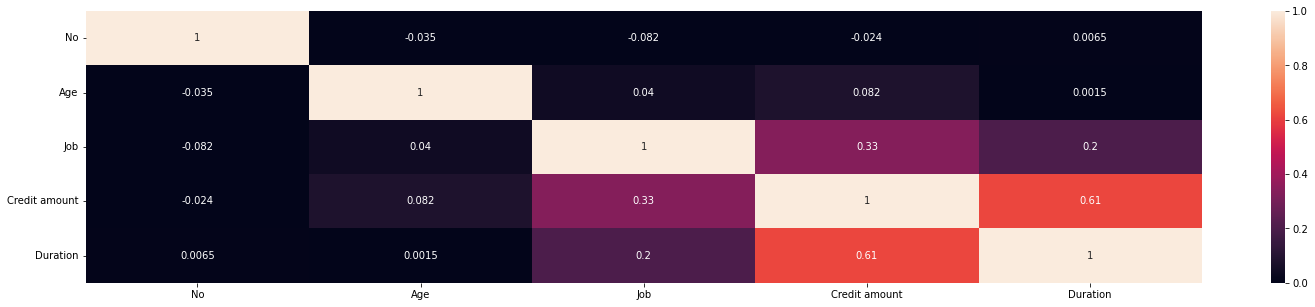

In [ ]:
#Melihat correlasi dalam DataSet
corr = data2.corr()


#Code untuk menampilkan heatmap correlation
plt.figure(figsize=(25,5))
sns.heatmap(data2.corr(), vmin=0, vmax=1,annot=True)
plt.show()

# EDA

## Target Risk

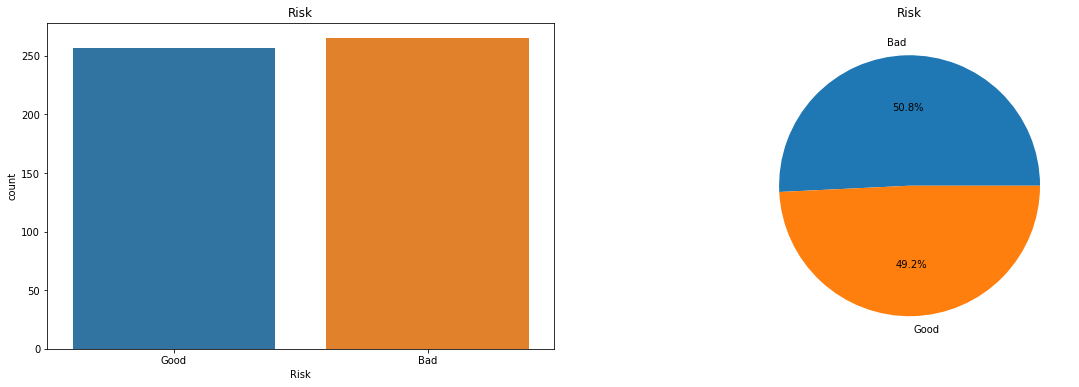

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Risk', data=data2)
plt.title('Risk')
plt.subplot(1, 2, 2)
plt.pie(data2.groupby('Risk').size(), labels=data2.groupby('Risk').size().index, autopct='%1.1f%%')
plt.title('Risk')
plt.show()

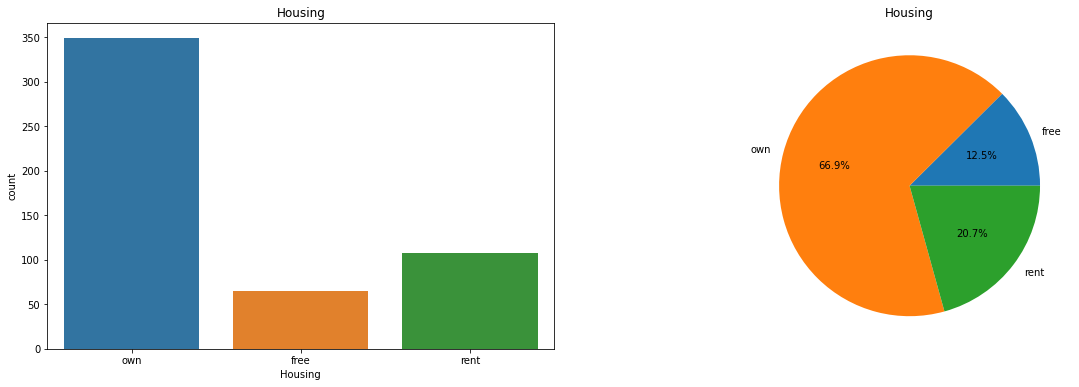

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Housing', data=data2)
plt.title('Housing')
plt.subplot(1, 2, 2)
plt.pie(data2.groupby('Housing').size(), labels=data2.groupby('Housing').size().index, autopct='%1.1f%%')
plt.title('Housing')
plt.show()


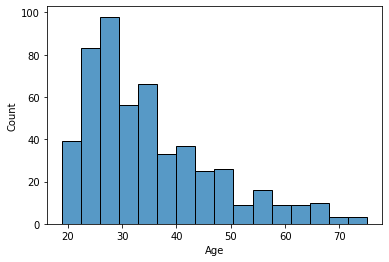

In [ ]:
ax = sns.histplot(x="Age", data=data2)


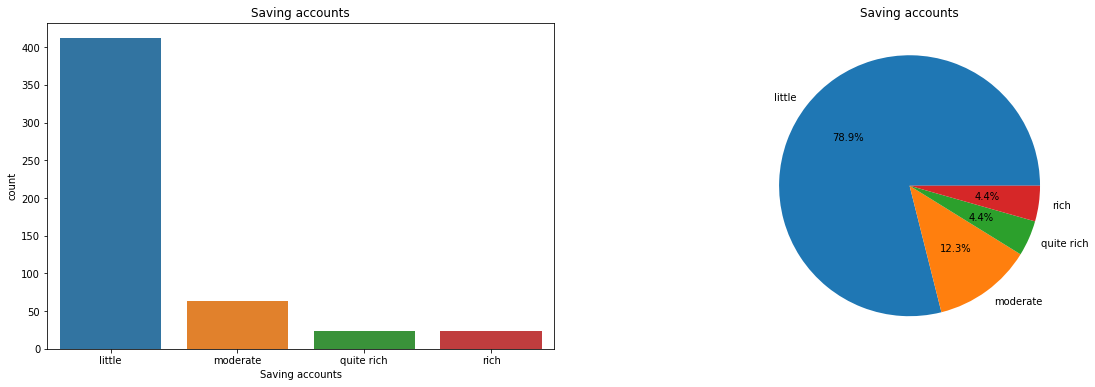

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Saving accounts', data=data2)
plt.title('Saving accounts')
plt.subplot(1, 2, 2)
plt.pie(data2.groupby('Saving accounts').size(), labels=data2.groupby('Saving accounts').size().index, autopct='%1.1f%%')
plt.title('Saving accounts')
plt.show()

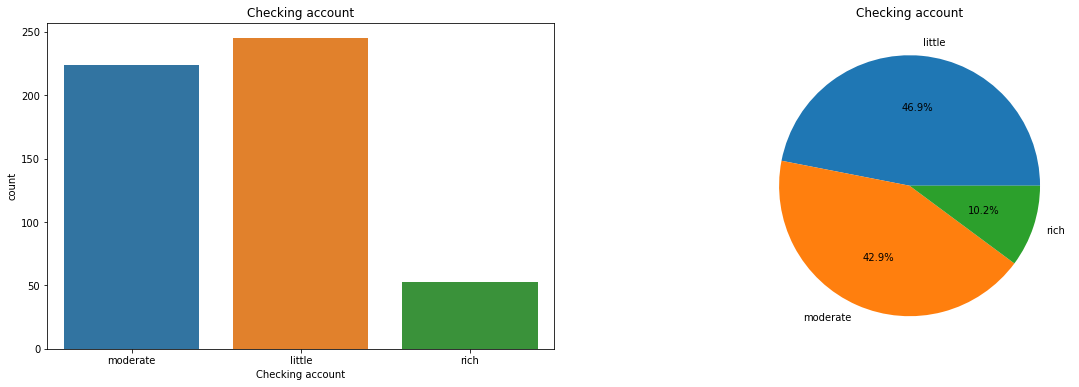

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Checking account', data=data2)
plt.title('Checking account')
plt.subplot(1, 2, 2)
plt.pie(data2.groupby('Checking account').size(), labels=data2.groupby('Checking account').size().index, autopct='%1.1f%%')
plt.title('Checking account')
plt.show()

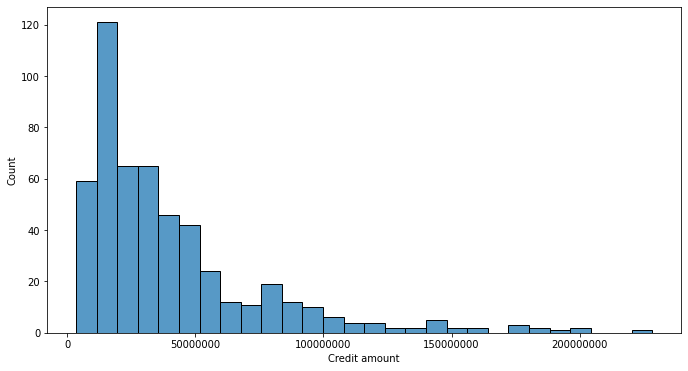

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
ax = sns.histplot(x="Credit amount", data=data2)
ax.ticklabel_format(useOffset=False, style='plain')


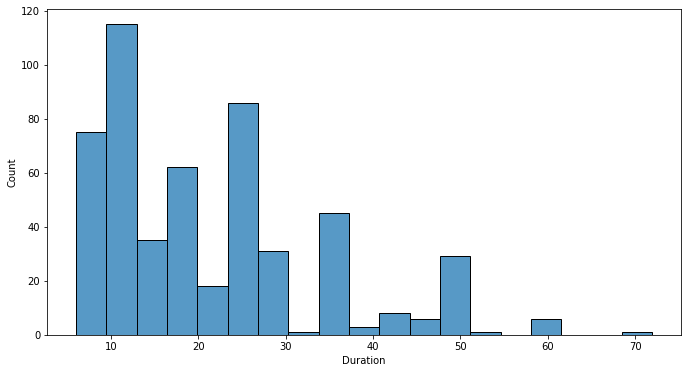

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
ax = sns.histplot(x="Duration", data=data2)
ax.ticklabel_format(useOffset=False, style='plain')

Text(0.5, 1.0, 'Purpose')

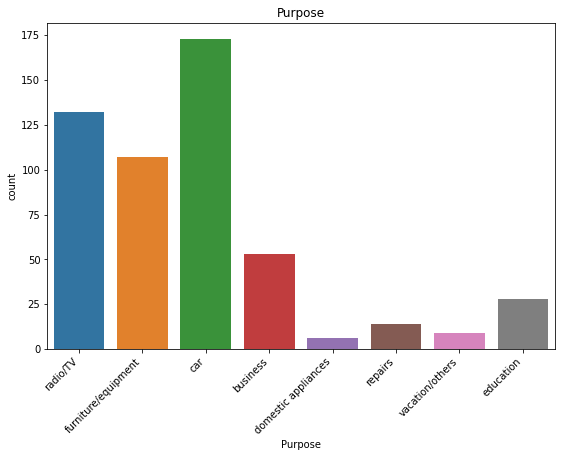

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Purpose', data=data2)
plt.xticks(rotation=45, ha='right')
plt.title('Purpose')

## Data Preprocessing

In [ ]:
data2.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,Good
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,Bad
4,4,53,male,2,free,little,little,60383130,24,car,Bad
7,7,35,male,3,rent,little,moderate,86148252,36,car,Bad
9,9,28,male,3,own,little,moderate,64896366,30,car,Good


Change Good = 0 , Bad = 1

In [ ]:
data2.Risk = data2.Risk.str.replace('Good',"0") 
data2.Risk = data2.Risk.str.replace('Bad',"1") 

data2.Risk = data2['Risk'].astype('int64')

In [ ]:
#Get Data for Model Inference
data_inf2 = data2.sample(22, random_state=31)
data_inf2

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
721,721,24,female,2,rent,rich,moderate,5368767,6,education,1
186,186,74,female,3,free,little,moderate,63594471,9,car,0
938,938,42,male,2,free,little,moderate,77964912,60,education,0
605,605,22,male,2,own,quite rich,little,35064372,24,furniture/equipment,1
351,351,29,female,2,own,little,moderate,11890641,9,furniture/equipment,0
456,456,36,male,2,rent,little,little,48418095,11,car,1
964,964,22,male,1,own,little,moderate,5629146,6,repairs,0
972,972,29,female,0,rent,little,little,14792007,24,car,1
374,374,60,female,3,free,moderate,moderate,183282018,60,vacation/others,0
976,976,64,female,2,own,little,moderate,9336447,6,radio/TV,0


In [ ]:
#Remove Inference Set
data_train_test2 = data2.drop(data_inf2.index)
data_train_test2

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,0
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,1
4,4,53,male,2,free,little,little,60383130,24,car,1
7,7,35,male,3,rent,little,moderate,86148252,36,car,1
10,10,25,female,2,rent,little,moderate,16056705,12,car,1
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,21611457,24,radio/TV,0
993,993,30,male,3,own,little,little,49087641,36,furniture/equipment,0
996,996,40,male,3,own,little,little,47822943,30,car,0
998,998,23,male,2,free,little,little,22876155,45,radio/TV,1


In [ ]:
#Reset Index
data_train_test2.reset_index(drop=True, inplace=True)
data_inf2.reset_index(drop=True, inplace=True)
data_inf2

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,721,24,female,2,rent,rich,moderate,5368767,6,education,1
1,186,74,female,3,free,little,moderate,63594471,9,car,0
2,938,42,male,2,free,little,moderate,77964912,60,education,0
3,605,22,male,2,own,quite rich,little,35064372,24,furniture/equipment,1
4,351,29,female,2,own,little,moderate,11890641,9,furniture/equipment,0
5,456,36,male,2,rent,little,little,48418095,11,car,1
6,964,22,male,1,own,little,moderate,5629146,6,repairs,0
7,972,29,female,0,rent,little,little,14792007,24,car,1
8,374,60,female,3,free,moderate,moderate,183282018,60,vacation/others,0
9,976,64,female,2,own,little,moderate,9336447,6,radio/TV,0


### Handling Missing Value

In [ ]:
data_train_test2.isna().sum()

No                  0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

### Splitting Data

In [ ]:
#Split between 'X' (features) and 'y' (target)
X2 = data_train_test2.drop('Risk', axis=1) #axis=1 ==> column
y2 = data_train_test2['Risk']
X2.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,22,female,2,own,little,moderate,73786449,48,radio/TV
1,3,45,male,2,free,little,little,97728918,42,furniture/equipment
2,4,53,male,2,free,little,little,60383130,24,car
3,7,35,male,3,rent,little,moderate,86148252,36,car
4,10,25,female,2,rent,little,moderate,16056705,12,car


In [ ]:
# Split between Train-Set and Test-Set 80% - 20%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=31)
print('X_train Size: ', X_train2.shape)
print('X_test Size: ', X_test2.shape)
print('y_train Size =', y_train2.shape)
print('y_test Size  =', y_test2.shape)

X_train Size:  (400, 10)
X_test Size:  (100, 10)
y_train Size = (400,)
y_test Size  = (100,)


### Handling Outlier

In [ ]:
# Making a function to visualize the outliers and graph
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
# Looping to check the Distribution of each column
dist_check = X_train2.skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [ ]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['Age', 'Credit amount', 'Duration']

Normal distribution : ['No', 'Job']


In [ ]:
#Making a function to check the outliers of the data with Skewed Distributed 
def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        text = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(text)

In [ ]:
#Checking the outliers 
for i in skew_dist:
    detect_skew(X_train2, variable=i, distance=1.5)

{'Variable': 'Age', 'Total Outliers': 10, 'Percentage': 2.5}
{'Variable': 'Credit amount', 'Total Outliers': 28, 'Percentage': 7.000000000000001}
{'Variable': 'Duration', 'Total Outliers': 6, 'Percentage': 1.5}


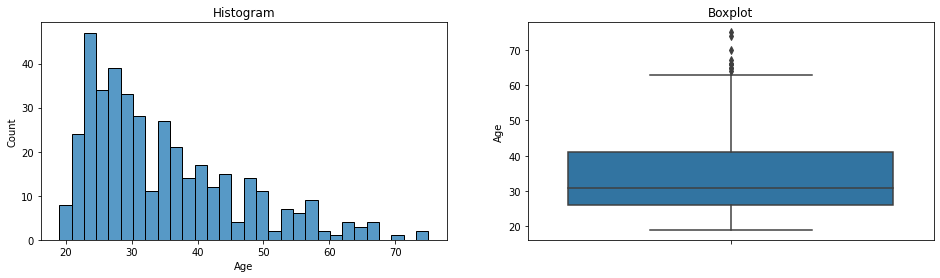

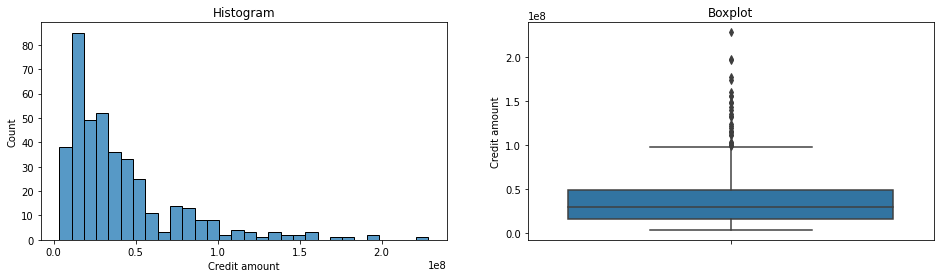

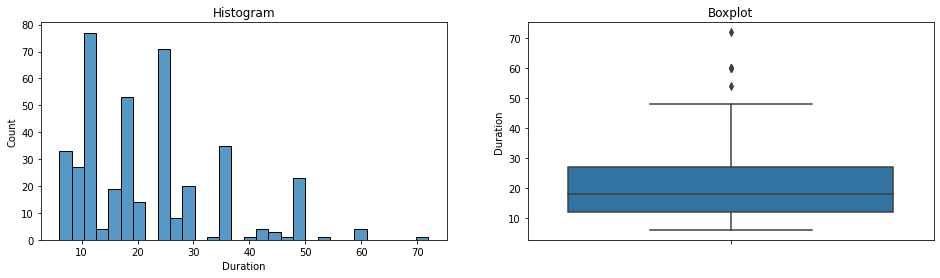

In [ ]:
#Visualising the outliers
diagnostic_plots(X_train2,'Age')
diagnostic_plots(X_train2,'Credit amount')
diagnostic_plots(X_train2,'Duration')


Censoring with Windsoriser

In [ ]:
#Censoring
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',  #Censor both the right and left end outliers
                          fold=1.5, #In normal range
                          variables=['Age', 'Credit amount','Duration',])

windsoriser.fit(X_train2)

X_train_cen2 = windsoriser.transform(X_train2)

### Feature Selection 

In [ ]:
#Check X_train
X_train_cen2.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
297,590,58.0,female,1,own,little,little,4773615.0,12.0,radio/TV
15,27,42.0,female,2,rent,rich,rich,5071191.0,12.0,radio/TV
175,339,31.0,male,1,own,little,moderate,18858879.0,10.0,furniture/equipment
113,208,21.0,male,1,own,little,little,81436632.0,24.0,business
139,273,28.0,male,2,own,little,moderate,37940940.0,48.0,radio/TV


In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns2 = X_train_cen2.select_dtypes(include=np.number).columns.tolist()
cat_columns2 = X_train_cen2.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns2)
print('Categorical Columns : ', cat_columns2)

Numerical Columns :  ['No', 'Age', 'Job', 'Credit amount', 'Duration']
Categorical Columns :  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


### Split Categorical and Numerical Column

In [ ]:
# Split Train-Set and Test-Set based on Column Types

X_train_num2 = X_train2[num_columns2]
X_train_cat2 = X_train2[cat_columns2]

X_test_num2 = X_test2[num_columns2]
X_test_cat2 = X_test2[cat_columns2]

### Feature Scaling

In [ ]:
# Feature Scaling using MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(X_train_num2)

X_train_num_scaled2 = scaler2.transform(X_train_num2)
X_test_num_scaled2 = scaler2.transform(X_test_num2)

X_train_num_scaled2

array([[0.59018036, 0.69642857, 0.33333333, 0.00600617, 0.09090909],
       [0.0260521 , 0.41071429, 0.66666667, 0.00732863, 0.09090909],
       [0.33867735, 0.21428571, 0.33333333, 0.0686026 , 0.06060606],
       ...,
       [0.02705411, 0.26785714, 0.66666667, 0.11786423, 0.01515152],
       [0.16232465, 0.91071429, 1.        , 0.38748071, 0.06060606],
       [0.4248497 , 0.03571429, 0.66666667, 0.13792153, 0.18181818]])

### Feature Encoding

In [ ]:
encoder2 = OrdinalEncoder()
encoder2.fit(X_train_cat2)

X_train_cat_encoded2 = encoder2.transform(X_train_cat2)
X_test_cat_encoded2 = encoder2.transform(X_test_cat2)

X_train_cat_encoded2

array([[0., 1., 0., 0., 5.],
       [0., 2., 3., 2., 5.],
       [1., 1., 0., 1., 4.],
       ...,
       [1., 1., 0., 1., 5.],
       [1., 0., 0., 1., 1.],
       [1., 2., 0., 1., 1.]])

In [ ]:
le2 = LabelEncoder()

In [ ]:
y_train_encoded2 = le2.fit_transform(y_train2)
y_train_encoded2

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [ ]:
y_test_encoded2 = le2.transform(y_test2)
y_test_encoded2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [ ]:
X_train_final2 = np.concatenate([X_train_num_scaled2, X_train_cat_encoded2], axis=1)
X_test_final2 = np.concatenate([X_test_num_scaled2, X_test_cat_encoded2], axis=1)
X_train_final2

array([[0.59018036, 0.69642857, 0.33333333, ..., 0.        , 0.        ,
        5.        ],
       [0.0260521 , 0.41071429, 0.66666667, ..., 3.        , 2.        ,
        5.        ],
       [0.33867735, 0.21428571, 0.33333333, ..., 0.        , 1.        ,
        4.        ],
       ...,
       [0.02705411, 0.26785714, 0.66666667, ..., 0.        , 1.        ,
        5.        ],
       [0.16232465, 0.91071429, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.4248497 , 0.03571429, 0.66666667, ..., 0.        , 1.        ,
        1.        ]])

In [ ]:
# Display as DataFrame

X_train_final_df2 = pd.DataFrame(X_train_final2, columns=[num_columns2+cat_columns2])
X_train_final_df2

,No,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose
0,0.590180,0.696429,0.333333,0.006006,0.090909,0.0,1.0,0.0,0.0,5.0
1,0.026052,0.410714,0.666667,0.007329,0.090909,0.0,2.0,3.0,2.0,5.0
2,0.338677,0.214286,0.333333,0.068603,0.060606,1.0,1.0,0.0,1.0,4.0
3,0.207415,0.035714,0.333333,0.346705,0.272727,1.0,1.0,0.0,0.0,0.0
4,0.272545,0.160714,0.666667,0.153405,0.636364,1.0,1.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
395,0.180361,0.196429,1.000000,0.230273,0.454545,1.0,1.0,0.0,1.0,0.0
396,0.750501,0.535714,0.666667,0.008376,0.000000,0.0,1.0,0.0,0.0,4.0
397,0.027054,0.267857,0.666667,0.117864,0.015152,1.0,1.0,0.0,1.0,5.0
398,0.162325,0.910714,1.000000,0.387481,0.060606,1.0,0.0,0.0,1.0,1.0


## Model Definition

In [ ]:
import xgboost as xgb
#Logistic Regression
log_model = LogisticRegression()
#Support Vector Machine
svm_model = SVC()
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=13)
#Random Forest
rf_model = RandomForestClassifier(random_state=15)
#KNN
knn_model = KNeighborsClassifier()
#Naive Bayes
nb_model = GaussianNB()
# GradientBoosting
xgb_model = xgb.XGBClassifier()

In [ ]:
# Cross-validation untuk base model

# Menyiapkan model dalam list
models = []
models.append(('log', log_model))
models.append(('svm', svm_model))
models.append(('dt', dt_model))
models.append(('rf', rf_model))
models.append(('knn', knn_model))
models.append(('nb', nb_model))
models.append(('xgb', xgb_model))

# Menyiapkan list kosong untuk wadah hasil cross validation
nama = []
hasil = []
mean_score = []
stdev_score = []
best_score = []


# Melakukan Cross Validation setiap model
for name, model in models:
    model.fit(X_train_final2,y_train2)
    scores = cross_val_score(model, X_train_final2, y_train2, scoring='accuracy', cv=5, n_jobs=-1)

    nama.append(name)
    hasil.append(scores)
    mean_score.append(round(np.mean(scores),5))
    stdev_score.append(round(np.std(scores),5))
    best = round(np.mean(scores),5) - round(np.std(scores),5)
    best_score.append(best)

cv_result = pd.DataFrame({'models':nama, 'mean_acc':mean_score, 'stdev_acc':stdev_score, 'best_acc':best_score})

In [ ]:
#result
result = cv_result.sort_values(by='best_acc', ascending=False)
result

,models,mean_acc,stdev_acc,best_acc
2,dt,0.9950,0.01000,0.98500
3,rf,0.9950,0.01000,0.98500
6,xgb,0.9950,0.01000,0.98500
4,knn,0.9225,0.02151,0.90099
0,log,0.9275,0.02894,0.89856
5,nb,0.9225,0.02550,0.89700
1,svm,0.9250,0.03260,0.89240


## Model Training

In [ ]:
#Training the base model
xgb_model.fit(X_train_final2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
params = {'max_depth': [6, 15],
              'learning_rate': [0.01, 0.1],
              'subsample': np.arange(0.5, 1.0),
              'n_estimators': [100, 250],
             
              }

grid_xgb2 = GridSearchCV(xgb.XGBClassifier(), params, refit = True, verbose = 1)

In [ ]:
#Training the model with Hyperparameters
grid_xgb2.fit(X_train_final2, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 15],
                         'n_estimators': [100, 250],
                         'subsample': array([0.5])},
             verbose=1)

In [ ]:
#Predict train set and test set svm hyperparameter
y_pred_train_xgb_grid2 = grid_xgb2.predict(X_train_final2)
y_pred_test_xgb_grid2 = grid_xgb2.predict(X_test_final2)

In [ ]:
# Classification report SVM Hyperparamater
print('Classification Report SVM Hyperparameter Data Train')
print('------------------------------------------------\n')
print(classification_report(y_train2, y_pred_train_xgb_grid2))
print('Classification Report SVM Hyperparameter Data Test')
print('------------------------------------------------\n')
print(classification_report(y_test2, y_pred_test_xgb_grid2))

Classification Report SVM Hyperparameter Data Train
------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       203
           1       0.99      1.00      0.99       197

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400

Classification Report SVM Hyperparameter Data Test
------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.98        58

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



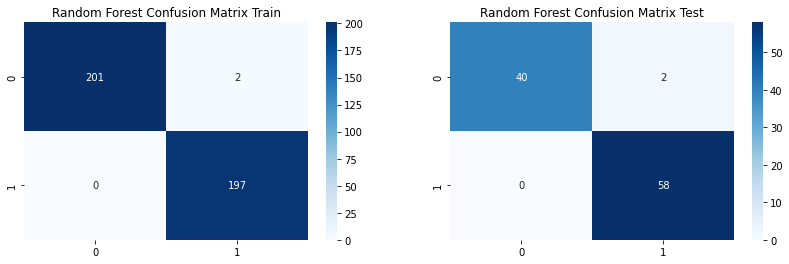

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
matrix_xgb_train2 = confusion_matrix(y_train2, y_pred_train_xgb_grid2)
sns.heatmap(matrix_xgb_train2, annot=True, cmap='Blues',fmt='d')
plt.title('Random Forest Confusion Matrix Train')

plt.subplot(1, 2, 2)
matrix_xgb_test2 = confusion_matrix(y_test2, y_pred_test_xgb_grid2)
sns.heatmap(matrix_xgb_test2, annot=True, cmap='Blues',fmt='d')
plt.title('Random Forest Confusion Matrix Test')
plt.show()

In [ ]:
with open('list_num_columns.txt', 'w') as file_1:
  file_1.write(str(num_columns2))

with open('list_cat_columns.txt', 'w') as file_2:
  file_2.write(str(cat_columns2))

## Inference

In [ ]:
with open('list_num_columns.txt', 'r') as file_1:
  list_num_columns2 = file_1.read()

with open('list_cat_columns.txt', 'r') as file_2:
  list_cat_columns2 = file_2.read()

In [ ]:
data_inf2.head(5)

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,721,24,female,2,rent,rich,moderate,5368767,6,education,1
1,186,74,female,3,free,little,moderate,63594471,9,car,0
2,938,42,male,2,free,little,moderate,77964912,60,education,0
3,605,22,male,2,own,quite rich,little,35064372,24,furniture/equipment,1
4,351,29,female,2,own,little,moderate,11890641,9,furniture/equipment,0


In [ ]:
list_num_columns2 = ast.literal_eval(list_num_columns2)
list_cat_columns2 = ast.literal_eval(list_cat_columns2)

In [ ]:
# Split between Numerical Columns and Categorical Columns

df_inf_num2 = data_inf2[list_num_columns2]
df_inf_cat2 = data_inf2[list_cat_columns2]


In [ ]:
# Feature Scaling and Feature Encoding


df_inf_num_scaled2 = scaler2.transform(df_inf_num2)
df_inf_cat_encoded2 = encoder2.transform(df_inf_cat2)
df_inf_num_scaled2

array([[0.72144289, 0.08928571, 0.66666667, 0.00865109, 0.        ],
       [0.18537074, 0.98214286, 1.        , 0.26741239, 0.04545455],
       [0.93887776, 0.41071429, 0.66666667, 0.33127617, 0.81818182],
       [0.60521042, 0.05357143, 0.66666667, 0.14062156, 0.27272727],
       [0.3507014 , 0.17857143, 0.66666667, 0.037635  , 0.04545455],
       [0.45591182, 0.30357143, 0.66666667, 0.19996694, 0.07575758],
       [0.96492986, 0.05357143, 0.33333333, 0.00980824, 0.        ],
       [0.97294589, 0.17857143, 0.        , 0.05052898, 0.27272727],
       [0.37374749, 0.73214286, 1.        , 0.79931673, 0.81818182],
       [0.97695391, 0.80357143, 0.66666667, 0.02628389, 0.        ],
       [0.12625251, 0.19642857, 0.66666667, 0.0200022 , 0.09090909],
       [0.05310621, 0.67857143, 0.66666667, 0.10739475, 0.45454545],
       [0.00801603, 0.16071429, 1.        , 0.27319815, 0.36363636],
       [0.45390782, 0.21428571, 0.66666667, 0.25022041, 0.27272727],
       [0.75250501, 0.07142857, 0.

In [ ]:
# Concate Numerical Columns and Categorical Columns

df_inf_final2 = np.concatenate([df_inf_num_scaled2, df_inf_cat_encoded2], axis=1)
df_inf_final2

array([[0.72144289, 0.08928571, 0.66666667, 0.00865109, 0.        ,
        0.        , 2.        , 3.        , 1.        , 3.        ],
       [0.18537074, 0.98214286, 1.        , 0.26741239, 0.04545455,
        0.        , 0.        , 0.        , 1.        , 1.        ],
       [0.93887776, 0.41071429, 0.66666667, 0.33127617, 0.81818182,
        1.        , 0.        , 0.        , 1.        , 3.        ],
       [0.60521042, 0.05357143, 0.66666667, 0.14062156, 0.27272727,
        1.        , 1.        , 2.        , 0.        , 4.        ],
       [0.3507014 , 0.17857143, 0.66666667, 0.037635  , 0.04545455,
        0.        , 1.        , 0.        , 1.        , 4.        ],
       [0.45591182, 0.30357143, 0.66666667, 0.19996694, 0.07575758,
        1.        , 2.        , 0.        , 0.        , 1.        ],
       [0.96492986, 0.05357143, 0.33333333, 0.00980824, 0.        ,
        1.        , 1.        , 0.        , 1.        , 6.        ],
       [0.97294589, 0.17857143, 0.       

Predict the Dataset

In [ ]:
# Predict Inference-Set

y_pred_inf2 = grid_xgb2.predict(df_inf_final2)
y_pred_inf2

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
y_inf_pred_gb2 = pd.DataFrame(y_pred_inf2, columns=['Predict XGB'])
pred2 =pd.concat([data_inf2, y_inf_pred_gb2],axis=1)
pred2

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Predict XGB
0,721,24,female,2,rent,rich,moderate,5368767,6,education,1,1
1,186,74,female,3,free,little,moderate,63594471,9,car,0,0
2,938,42,male,2,free,little,moderate,77964912,60,education,0,0
3,605,22,male,2,own,quite rich,little,35064372,24,furniture/equipment,1,1
4,351,29,female,2,own,little,moderate,11890641,9,furniture/equipment,0,0
5,456,36,male,2,rent,little,little,48418095,11,car,1,1
6,964,22,male,1,own,little,moderate,5629146,6,repairs,0,0
7,972,29,female,0,rent,little,little,14792007,24,car,1,1
8,374,60,female,3,free,moderate,moderate,183282018,60,vacation/others,0,0
9,976,64,female,2,own,little,moderate,9336447,6,radio/TV,0,0


## Conclusion / Overall Analysis


No 1 
- with only 100000 dataset the LSTM model still cannot predict 17 category out of 100000 words 

No 2
- XGB model can predict with 100% accuracy

Insight 

Bad Risk Qualification
- Job 0 - unskilled and non-resident & 1 - unskilled and resident &  Checking account - little
- Housing - rent
